Assignment 3 - Pontus Björklid

Personal reflections and feedback: <br>
a. It is possible/reasonable thanks to the fact that a FANN with sufficiently many neurons can model any continuous function. <br>
b. If we don´t have a validation set, we run the risk of overfitting. In this case we are led to believe that are model preformce very well, but in reality it has only learned the train-dataset "by heart" and is in fact not a very good estimation of the underlying "pattern" we are trying to model.<br>
c. The short answer is: "Because we dont know what the optimal structure looks like, or if it even exists.". The longer answer is that: "There are many factors that affect the number of neurons, e.g. size of out input and complexity of the model we are trying to approximate. Yet, even when taking this into consideration we still dont have a clear answer. The solution is to try different depths and number of neurons as well as relying of techniques like early stopping to reach a sufficent result.". <br>
d. Overfitting can occur when our model is too flexible relative to out data, and it captures the noice and not the underlying patterns. Underfitting can occur when the model is too simple compare to the data and cant cpature its complexity. Finding the right model complexity compared to the data complexity is not easy. <br>
e. The provided instructions and code, created a good balance! Sometimes I recieved some wierd results and then maybe some more guidelines on how to pick parameters and what to look for on the graphs would be helpful.<br>
f. More questions along the way, that forces you to stop and reflect.<br>
g. No.<br>


In [5]:
#imports
import torch as t
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from numpy import genfromtxt
from tqdm import tqdm
import numpy as np

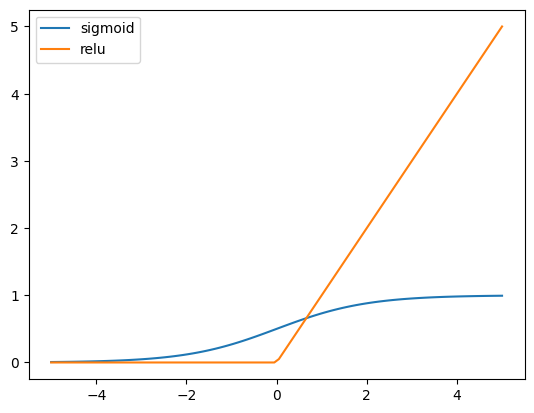

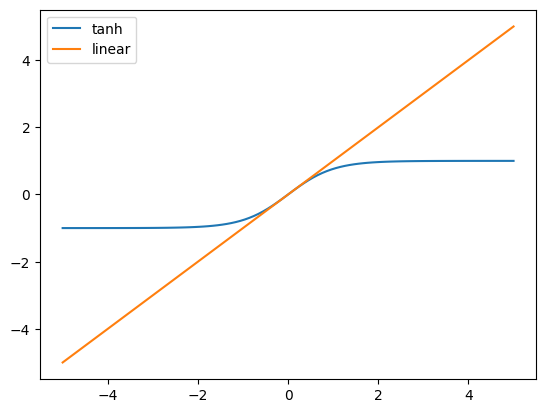

In [6]:
#Problem 2.1 - a

def f(x):
    return 1 / (1+ t.exp(-x))

def f_relu(x):
    return t.max(x, t.tensor(0.))

def f_tanh(x):
    return t.tanh(x)

def f_lin(x):
    return x

#plot functions on [-5, 5]
x = t.linspace(-5, 5, 100)
plt.plot(x, f(x), label='sigmoid')
plt.plot(x, f_relu(x), label='relu')
plt.legend()
plt.show()
plt.plot(x, f_tanh(x), label='tanh')
plt.plot(x, f_lin(x), label='linear')
plt.legend()
plt.show()


Problem 2.1 - b

Weight and bias

Problem 2.1 - c

They have a weight corresponding to each input x, and a bias. Hence, for d inputs x the neoron has d+1 tunable parameters.

Problem 2.2 - a

Total weights = 10 + 10 + 2 = 22 
Total biases = 5 + 2 + 1 = 8 

Total = 30

Problem 2.2 - b

y(x1, x2) = sig(wout,0 + wout,1*z1(x1,x2) + wout,2*z2(x1,x2))

y(x1, x2) = sig(wout,0 + wout,1*sig(v1,0 + v1,1*z1(x1,x2) + v1,2*z2(x1,x2) + v1,3*z3(x1,x2) + v1,4*z4(x1,x2) + v1,5*z5(x1,x2)) + wout,2*sig(v2,0 + v2,1*z1(x1,x2) + v2,2*z2(x1,x2) + v2,3*z3(x1,x2) + v2,4*z4(x1,x2) + v2,5*z5(x1,x2)))

y(x1, x2) = 
sig(wout,0 + 

wout,1*sig(v1,0 + 
v1,1*sig(u1,0 + u1,1*(x1,x2) + u1,2*(x1,x2)) + 
v1,2*sig(u2,0 + u2,1*(x1,x2) + u2,2*(x1,x2)) + 
v1,3*sig(u3,0 + u3,1*(x1,x2) + u3,2*(x1,x2)) + 
v1,4*sig(u4,0 + u4,1*(x1,x2) + u4,2*(x1,x2)) + 
v1,5*sig(u5,0 + u5,1*(x1,x2) + u5,2*(x1,x2))) + 

wout,2*sig(v2,0 + 
v2,1*sig(u1,0 + u1,1*(x1,x2) + u1,2*(x1,x2)) + 
v2,2*sig(u2,0 + u2,1*(x1,x2) + u2,2*(x1,x2)) + 
v2,3*sig(u3,0 + u3,1*(x1,x2) + u3,2*(x1,x2)) + 
v2,4*sig(u4,0 + u4,1*(x1,x2) + u4,2*(x1,x2)) + 
v2,5*sig(u5,0 + u5,1*(x1,x2) + u5,2*(x1,x2))))

2.3 - a

MSE -> kg^2 <br>
RMSE -> kg

2.4 - a

SGD: 3*10^6 <br>
DG: 3

2.4 - b

GD will converge to the closet minima and get stuck. If the initial guess is not prefect GD on an obj. func. with a lot of shallow local minima, will result in it converging to an unwanted minima. 

SGD can, thanks to its random nature, escape a local minima. 


4 Task A

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 81.25it/s]


Final cost:  0.044393703


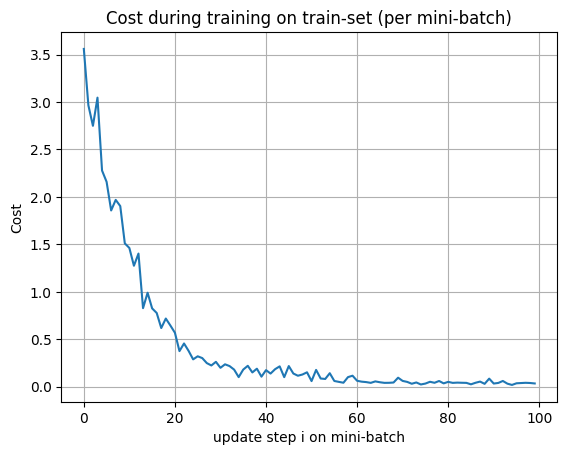

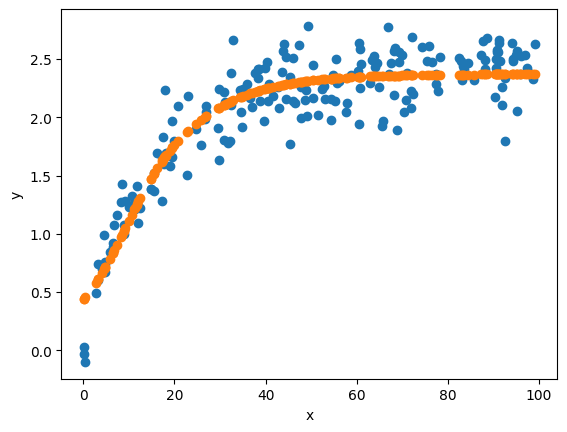

In [26]:
#4 Task A

#Set parameters
######################
bs = 32
eta = 0.01
n_epochs = 20
training_minibatch_Js = []
train_frac = 0.7
eval_frac = 0.10
test_frac = 0.20
eval_interval = 10
######################

#Load data
data = genfromtxt('dataset_Marvin_Minsky.csv', delimiter=',', skip_header=1)
X = data[:,0]
y_obs = data[:,1]
X = t.tensor(X).reshape(len(X),1).float()
y_obs = t.tensor(y_obs).reshape(len(y_obs),1).float()
my_dataset = TensorDataset(X, y_obs)

#Split data
train_data, eval_data, test_data = t.utils.data.random_split(my_dataset, [int(train_frac*len(data)), int(eval_frac*len(data)), int(test_frac*len(data))])

#Create data loaders
train_loader = DataLoader(dataset = train_data, batch_size=bs, shuffle=True)

#Create model
model = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 3),
    nn.Tanh(),
    nn.Linear(in_features = 3, out_features = 3),
    nn.Tanh(),
    nn.Linear(in_features = 3, out_features = 1)
)

#Create cost function
cost_fn = nn.MSELoss()

#Create optimizer
optim = t.optim.Adam(model.parameters(), lr=eta)

#Train model
for epoch_i in tqdm(range(n_epochs)):
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        cost = cost_fn(y_pred, y_batch)
        optim.zero_grad()
        cost.backward()
        optim.step()
        training_minibatch_Js.append(cost.item())

#Generate final predictions for plotting
with t.no_grad():
    #for name, parameter in model.named_parameters():
        #print(name, parameter.data.detach().numpy())
    y_preds = model(X)

print('Final cost: ', cost_fn(y_preds, y_obs).detach().numpy())

#Plot results
plt.plot(training_minibatch_Js)
plt.xlabel("update step i on mini-batch")
plt.ylabel("Cost")
plt.title("Cost during training on train-set (per mini-batch)")
plt.grid()
plt.show()
plt.plot(X, y_obs, 'o', label='Y ture')
plt.plot(X, y_preds.detach().numpy(), "o", label='Preds')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

5 Task B

Text(0.5, 0.5, 'x2')

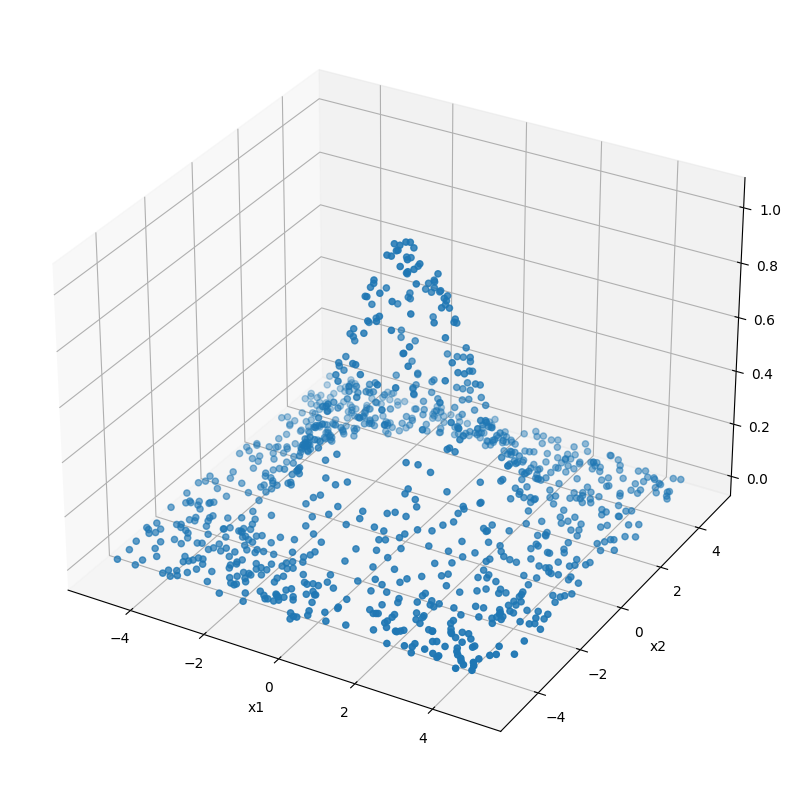

In [8]:
#5 Task B - a 

N = 1000
x = 10 * t.rand(size=[N, 2]) - 5
mean_true = t.tensor([0.0, 0.0])
sigma_noise = 0.04
y = t.zeros(N).reshape(-1,1)

for i in range(len(x)):
    y[i] = t.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

#Plotting
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

100%|██████████| 10/10 [00:01<00:00,  7.50it/s]


Final cost:  0.0012362293
Learning rate:  0.05


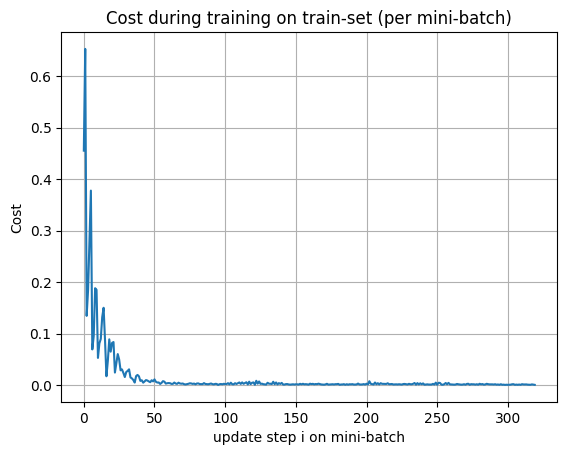

Text(0.5, 0.5, 'x2')

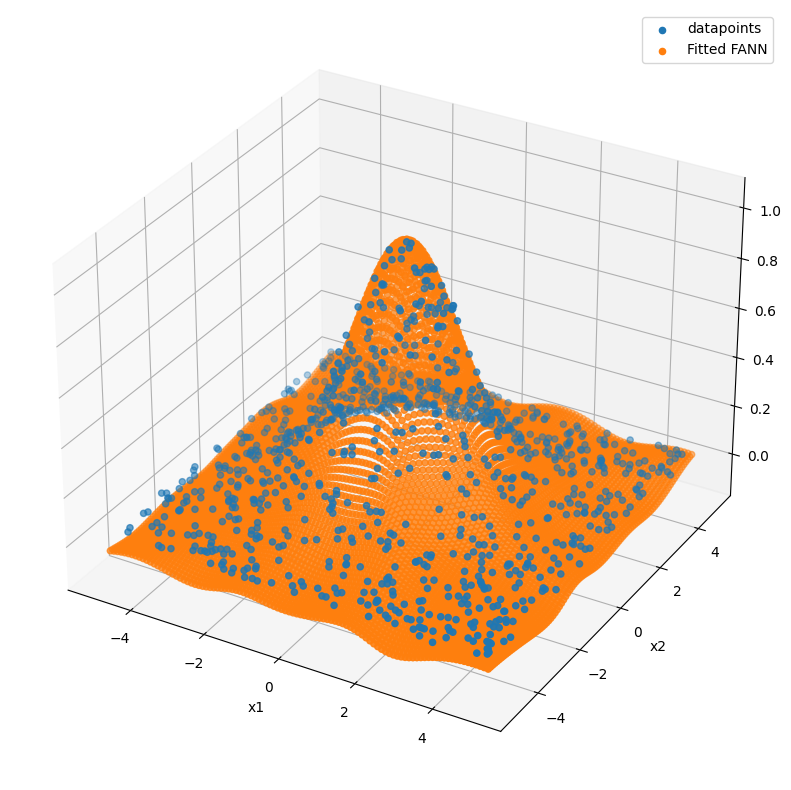

In [33]:
#5 Task B - b,c,d 2-50-1

#Generate data
N = 1000
x = 10 * t.rand(size=[N, 2]) - 5
mean_true = t.tensor([0.0, 0.0])
sigma_noise = 0.04
y = t.zeros(N).reshape(-1,1)

for i in range(len(x)):
    y[i] = t.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

#Set parameters
######################
bs = 32
n_epochs = 10
eta = 0.05
training_minibatch_Js = []
######################

my_dataset = TensorDataset(x, y)
my_dataloader = DataLoader(dataset = my_dataset, batch_size=bs, shuffle=True)

#Create model
model_1 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 50),
    nn.Tanh(),
    nn.Linear(in_features = 50, out_features = 1)
)

#Create cost function
cost_fn = nn.MSELoss()

#Create optimizer
optim = t.optim.Adam(model_1.parameters(), lr=eta)

#Train model
for epoch_i in tqdm(range(n_epochs)):
    for X_batch, y_batch in my_dataloader:
        y_pred = model_1(X_batch)
        cost = cost_fn(y_pred, y_batch)
        optim.zero_grad()
        cost.backward()
        optim.step()
        training_minibatch_Js.append(cost.item())


#Generate final predictions for plotting
x1 = t.linspace(-5, 5, 100)
x2 = t.linspace(-5, 5, 100)
X, Y = t.meshgrid(x1, x2)
s = t.stack([X.ravel(), Y.ravel()]).T

with t.no_grad():
    print('Final cost: ', cost_fn(model_1(x), y).detach().numpy())
    y_preds = model_1(s)

#Print answers
print("Learning rate: ", eta)

#Plot training
plt.plot(training_minibatch_Js)
plt.xlabel("update step i on mini-batch")
plt.ylabel("Cost")
plt.title("Cost during training on train-set (per mini-batch)")
plt.grid()
plt.show()

#Plot results
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
ax.scatter(x[:,0], x[:,1], y, label='datapoints')
ax.scatter(s[:,0], s[:,1], y_preds, label='Fitted FANN')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

100%|██████████| 10/10 [00:01<00:00,  5.55it/s]


Final cost:  0.0010839049
Learning rate:  0.025


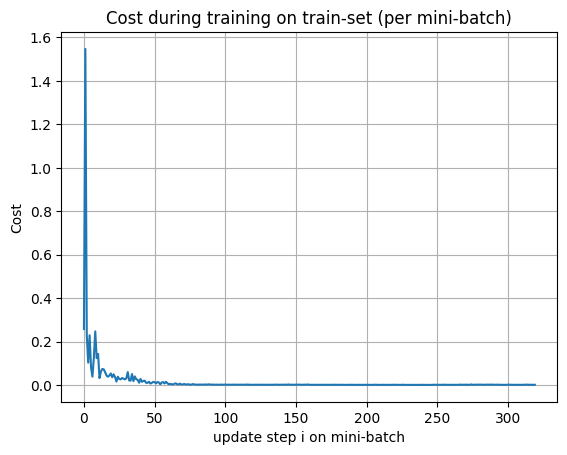

Text(0.5, 0.5, 'x2')

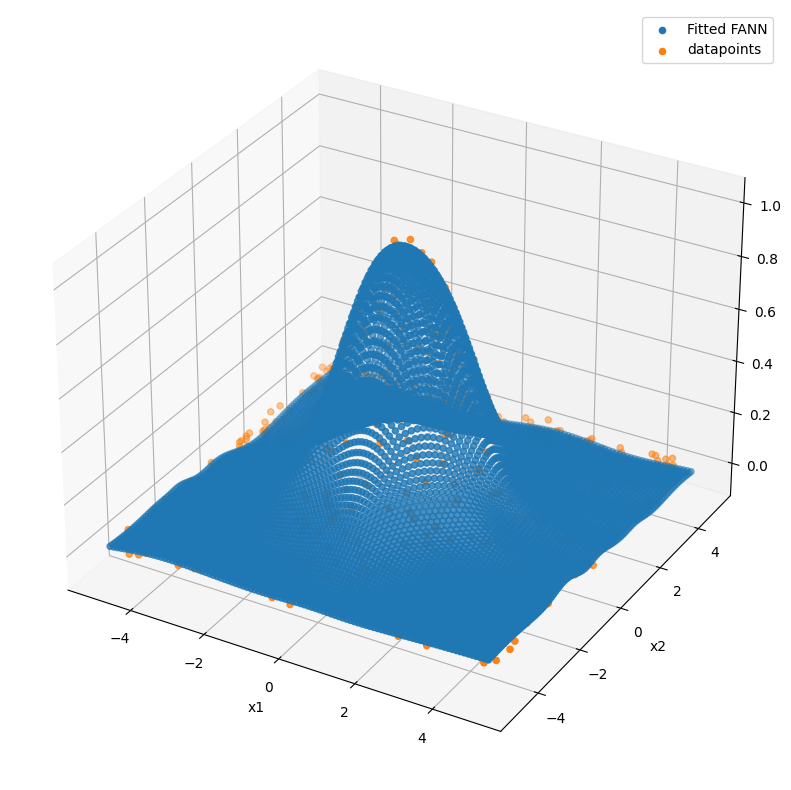

In [34]:
#5 Task B - b,c,d 2-50-50-1

#Generate data
N = 1000
x = 10 * t.rand(size=[N, 2]) - 5
mean_true = t.tensor([0.0, 0.0])
sigma_noise = 0.04
y = t.zeros(N).reshape(-1,1)

for i in range(len(x)):
    y[i] = t.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

#Set parameters
######################
bs = 32
n_epochs = 10
eta = 0.025
training_minibatch_Js = []
######################

my_dataset = TensorDataset(x, y)
my_dataloader = DataLoader(dataset = my_dataset, batch_size=bs, shuffle=True)

#Create model
model_2 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 50),
    nn.Tanh(),
    nn.Linear(in_features = 50, out_features = 50),
    nn.Tanh(),
    nn.Linear(in_features = 50, out_features = 1),
)

#Create cost function
cost_fn = nn.MSELoss()

#Create optimizer
optim = t.optim.Adam(model_2.parameters(), lr=eta)

for epoch_i in tqdm(range(n_epochs)):
    for X_batch, y_batch in my_dataloader:
        y_pred = model_2(X_batch)
        cost = cost_fn(y_pred, y_batch)
        optim.zero_grad()
        cost.backward()
        optim.step()
        training_minibatch_Js.append(cost.item())

x1 = t.linspace(-5, 5, 100)
x2 = t.linspace(-5, 5, 100)
X, Y = t.meshgrid(x1, x2)
s = t.stack([X.ravel(), Y.ravel()]).T

with t.no_grad():
    print('Final cost: ', cost_fn(model_2(x), y).detach().numpy())
    y_preds = model_2(s)

#Print answers
print("Learning rate: ", eta)

#Plot training
plt.plot(training_minibatch_Js)
plt.xlabel("update step i on mini-batch")
plt.ylabel("Cost")
plt.title("Cost during training on train-set (per mini-batch)")
plt.grid()
plt.show()

#Plotting 
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
ax.scatter(s[:,0], s[:,1], y_preds,label='Fitted FANN')
ax.scatter(x[:,0], x[:,1], y,label='datapoints')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

6 Task C

In [35]:
#6 Task C - a 

N = 10
x = 10 * t.rand(size=[N, 2]) - 5
mean_true = t.tensor([0.0, 0.0])
sigma_noise = 0.04
y = t.zeros(N).reshape(-1,1)

for i in range(len(x)):
    y[i] = t.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

my_dataset = TensorDataset(x, y)

#evalutate with RMSE
def evaluate_model(dataset, model):
    loader_eval = DataLoader(dataset = dataset, batch_size=len(dataset))
    cost_fn_eval = nn.MSELoss()
    model.eval()
    with t.no_grad():
        for X_batch, y_batch in loader_eval:
            y_pred = model(X_batch)
    model.train()
    eval_cost = cost_fn_eval(y_pred, y_batch)
    return t.sqrt(eval_cost).item()

evaluation_mod1 = evaluate_model(my_dataset, model_1)
evaluation_mod2 = evaluate_model(my_dataset, model_2)

print('RMSE', evaluation_mod1)
print('RMSE', evaluation_mod2)

if evaluation_mod1 < evaluation_mod2:
    print('Model 1 is better')
else:
    print('Model 2 is better')

RMSE 0.040016058832407
RMSE 0.030489245429635048
Model 2 is better


In [36]:
#6 Task C - b

N_bigtest = 250000
#Generate big test data
X_bigtest = 10 * t.rand(size=[N_bigtest, 2]) - 5
mean_true = t.tensor([0.0, 0.0])
sigma_noise = 0.04
y_bigtest = t.zeros(N_bigtest).reshape(-1,1)

for i in range(len(X_bigtest)):
    y_bigtest[i] = t.exp(-((X_bigtest[i,:]-mean_true).T@(X_bigtest[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

my_bigtest_dataset = TensorDataset(X_bigtest, y_bigtest)

#evalutate with RMSE
def evaluate_model(dataset, model):
    loader_eval = DataLoader(dataset = dataset, batch_size=len(dataset))
    cost_fn_eval = nn.MSELoss()
    model.eval()
    with t.no_grad():
        for X_batch, y_batch in loader_eval:
            y_pred = model(X_batch)
    model.train()
    eval_cost = cost_fn_eval(y_pred, y_batch)
    return t.sqrt(eval_cost).item()

evaluation_bigtest = evaluate_model(my_bigtest_dataset, model_2)
print('RMSE on big test data: ', evaluation_bigtest)

RMSE on big test data:  0.03362356498837471


6 Task c - b

The law of large numbers states that as the sample size increases the sample mean converges to the true mean. 

In [37]:
#6 Task C - c

if evaluation_mod2 < evaluation_bigtest:
    print('Estimate is optimistic')
else:
    print('Estimate is pessimistic')

print("Difference: ", evaluation_bigtest - evaluation_mod2)
print("Difference in percent: ", ((evaluation_bigtest - evaluation_mod2)/(evaluation_bigtest))*100, "%")

Estimate is optimistic
Difference:  0.003134319558739662
Difference in percent:  9.32179428273994 %


6 Task C - c

Yes, since the difference is quite large it should have been bigger.

7 Task D

 10%|█         | 21/200 [00:01<00:09, 19.59it/s]


Early stopping at epoch  21
RMSE on test data:  0.024520300328731537


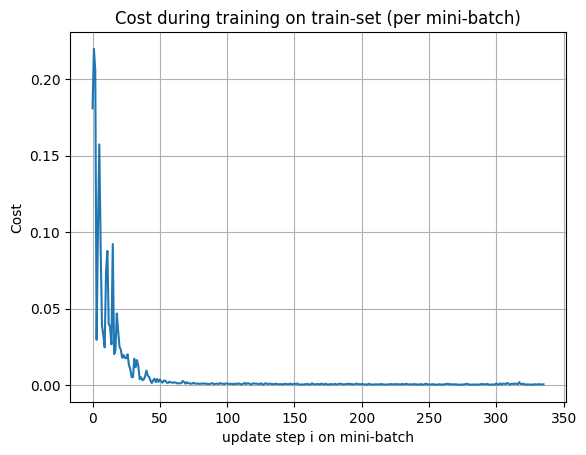

Text(0.5, 0.5, 'x2')

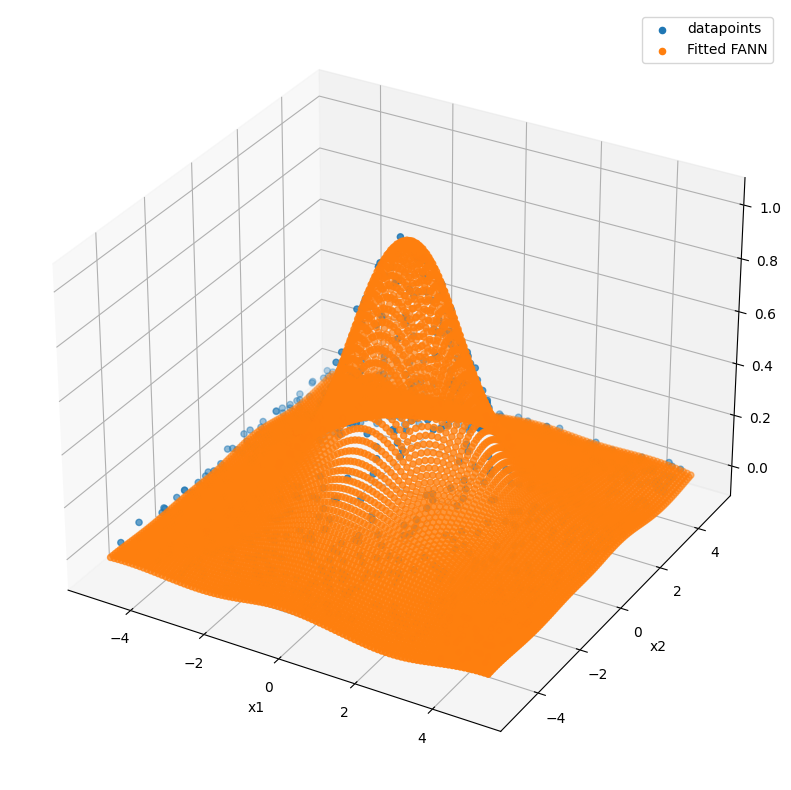

In [22]:
#7 Task D

#Set parameters
######################
#Data generation
n_datapoints = 1000
mean_true = t.tensor([0.0, 0.0])
sigma_noise = 0.04
train_frac = 0.5
val_frac = 0.25
test_frac = 0.25

#Training
bs = 32
n_epochs = 200
eta = 0.01
#eval_interval = 10

RMSE_list = []
training_minibatch_Js = []
######################

#Generate data
X = 10 * t.rand(size=[n_datapoints, 2]) - 5
sigma_noise = 0.04
y_obs = t.zeros(n_datapoints).reshape(-1,1)

for i in range(len(X)):
    y_obs[i] = t.exp(-((X[i,:]-mean_true).T@(X[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

my_dataset = TensorDataset(X, y_obs)

#Split data
train_data, val_data, test_data = t.utils.data.random_split(my_dataset, [int(train_frac*len(my_dataset)), int(val_frac*len(my_dataset)), int(test_frac*len(my_dataset))])

#Create training data loader
train_loader = DataLoader(dataset = train_data, batch_size=bs, shuffle=True)

#Create model
model = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 50),
    nn.Tanh(),
    nn.Linear(in_features = 50, out_features = 50),
    nn.Tanh(),
    nn.Linear(in_features = 50, out_features = 1)
)

#Create cost function
cost_function = nn.MSELoss()

#Create optimizer
optim = t.optim.Adam(model.parameters(), lr=eta)

#Model evaluation function
def evaluate_model(dataset, model):
    loader_eval = DataLoader(dataset = dataset, batch_size=len(dataset))
    cost_fn_eval = nn.MSELoss()
    model.eval()
    with t.no_grad():
        for X_batch, y_batch in loader_eval:
            y_pred = model(X_batch)
    model.train()
    eval_cost = cost_fn_eval(y_pred, y_batch)
    return t.sqrt(eval_cost).item()

#Training loop
for epoch_i in tqdm(range(n_epochs)):
    RMSE = evaluate_model(val_data, model)
    RMSE_list.append(RMSE)
    if epoch_i >= 5:
        if np.mean([[RMSE_list[epoch_i-6]], [RMSE_list[epoch_i-5]], [RMSE_list[epoch_i-4]]]) < np.mean([[RMSE_list[epoch_i-3]], [RMSE_list[epoch_i-2]], [RMSE_list[epoch_i-1]]]):
            print('Early stopping at epoch ', epoch_i)
            break
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        cost = cost_function(y_pred, y_batch)
        optim.zero_grad()
        cost.backward()
        optim.step()
        training_minibatch_Js.append(cost.item())

#Evaluate model
print('RMSE on test data: ', evaluate_model(test_data, model))

x1 = t.linspace(-5, 5, 100)
x2 = t.linspace(-5, 5, 100)
X_, Y_ = t.meshgrid(x1, x2)
s = t.stack([X_.ravel(), Y_.ravel()]).T

with t.no_grad():
    y_preds = model(s)

#Plot training
plt.plot(training_minibatch_Js)
plt.xlabel("update step i on mini-batch")
plt.ylabel("Cost")
plt.title("Cost during training on train-set (per mini-batch)")
plt.grid()
plt.show()

#Plotting 
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], y_obs, label='datapoints')
ax.scatter(s[:,0], s[:,1], y_preds, label='Fitted FANN')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [15]:
#7 Task D

N_bigtest = 250000

#Generate big test data
X_bigtest = 10 * t.rand(size=[N_bigtest, 2]) - 5
y_bigtest = t.zeros(N_bigtest).reshape(-1,1)

for i in range(len(X_bigtest)):
    y_bigtest[i] = t.exp(-((X_bigtest[i,:]-mean_true).T@(X_bigtest[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

my_bigtest_dataset = TensorDataset(X_bigtest, y_bigtest)

print('RMSE on test data: ', evaluate_model(test_data, model))
print('RMSE on big test data: ', evaluate_model(my_bigtest_dataset, model))

RMSE on test data:  0.038015834987163544
RMSE on big test data:  0.03827837109565735


8 Task E

  0%|          | 0/200 [00:00<?, ?it/s]

  7%|▋         | 14/200 [00:00<00:05, 31.59it/s]


Early stopping at epoch  14
RMSE on test data:  0.11380301415920258


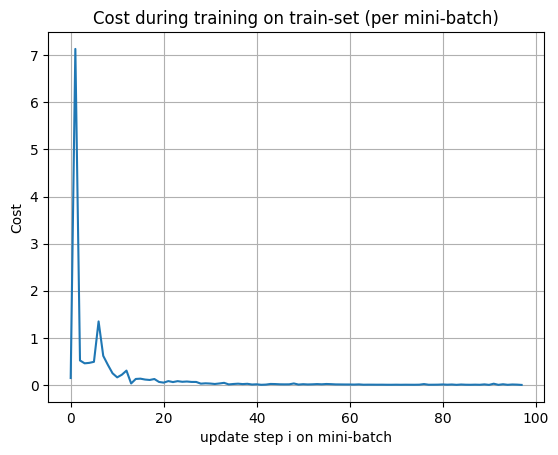

Text(0.5, 0.5, 'x2')

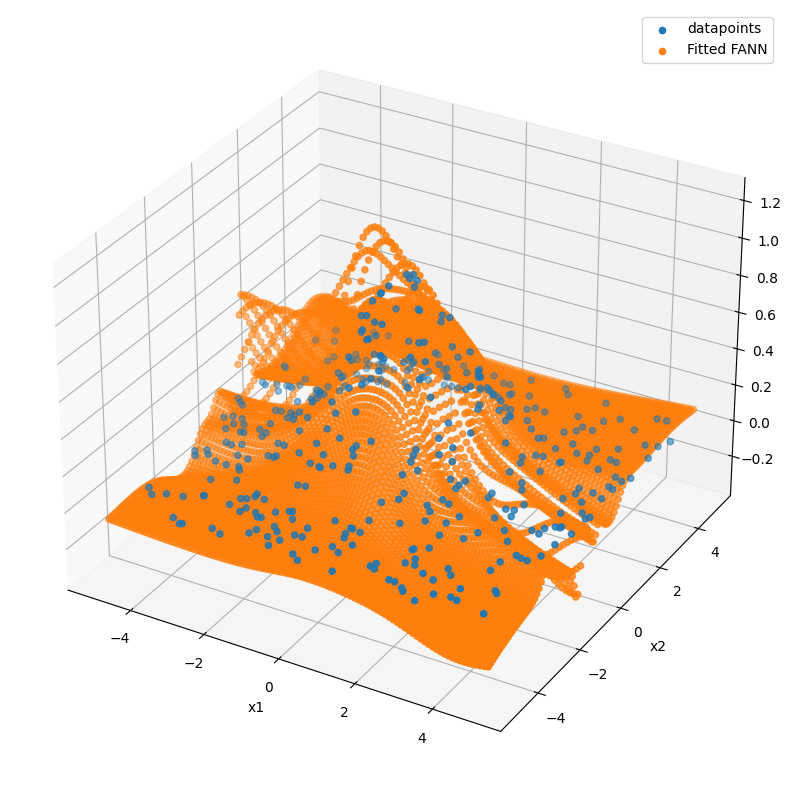

In [23]:
#8 Task E - 400

#Set parameters
######################
#Data generation
n_datapoints = 400
mean_true = t.tensor([0.0, 0.0])
sigma_noise = 0.04
train_frac = 0.5
val_frac = 0.25
test_frac = 0.25

#Training
bs = 32
n_epochs = 200
eta = 0.05
#eval_interval = 10

RMSE_list = []
training_minibatch_Js = []
######################

#Generate data
X = 10 * t.rand(size=[n_datapoints, 2]) - 5
sigma_noise = 0.04
y_obs = t.zeros(n_datapoints).reshape(-1,1)

for i in range(len(X)):
    y_obs[i] = t.exp(-((X[i,:]-mean_true).T@(X[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

my_dataset = TensorDataset(X, y_obs)

#Split data
train_data, val_data, test_data = t.utils.data.random_split(my_dataset, [int(train_frac*len(my_dataset)), int(val_frac*len(my_dataset)), int(test_frac*len(my_dataset))])

#Create training data loader
train_loader = DataLoader(dataset = train_data, batch_size=bs, shuffle=True)

#Create model
model = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 50),
    nn.Tanh(),
    nn.Linear(in_features = 50, out_features = 50),
    nn.Tanh(),
    nn.Linear(in_features = 50, out_features = 1)
)

#Create cost function
cost_function = nn.MSELoss()

#Create optimizer
optim = t.optim.Adam(model.parameters(), lr=eta)

#Model evaluation function
def evaluate_model(dataset, model):
    loader_eval = DataLoader(dataset = dataset, batch_size=len(dataset))
    cost_fn_eval = nn.MSELoss()
    model.eval()
    with t.no_grad():
        for X_batch, y_batch in loader_eval:
            y_pred = model(X_batch)
    model.train()
    eval_cost = cost_fn_eval(y_pred, y_batch)
    return t.sqrt(eval_cost).item()

#Training loop
for epoch_i in tqdm(range(n_epochs)):
    RMSE = evaluate_model(val_data, model)
    RMSE_list.append(RMSE)
    if epoch_i >= 5:
        if np.mean([[RMSE_list[epoch_i-6]], [RMSE_list[epoch_i-5]], [RMSE_list[epoch_i-4]]]) < np.mean([[RMSE_list[epoch_i-3]], [RMSE_list[epoch_i-2]], [RMSE_list[epoch_i-1]]]):
            print('Early stopping at epoch ', epoch_i)
            break
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        cost = cost_function(y_pred, y_batch)
        optim.zero_grad()
        cost.backward()
        optim.step()
        training_minibatch_Js.append(cost.item())

#Evaluate model
print('RMSE on test data: ', evaluate_model(test_data, model))

x1 = t.linspace(-5, 5, 100)
x2 = t.linspace(-5, 5, 100)
X_, Y_ = t.meshgrid(x1, x2)
s = t.stack([X_.ravel(), Y_.ravel()]).T

with t.no_grad():
    y_preds = model(s)

#Plot training
plt.plot(training_minibatch_Js)
plt.xlabel("update step i on mini-batch")
plt.ylabel("Cost")
plt.title("Cost during training on train-set (per mini-batch)")
plt.grid()
plt.show()

#Plotting 
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], y_obs, label='datapoints')
ax.scatter(s[:,0], s[:,1], y_preds, label='Fitted FANN')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [17]:
#8 Task E - 400

N_bigtest = 250000

#Generate big test data
X_bigtest = 10 * t.rand(size=[N_bigtest, 2]) - 5
y_bigtest = t.zeros(N_bigtest).reshape(-1,1)

for i in range(len(X_bigtest)):
    y_bigtest[i] = t.exp(-((X_bigtest[i,:]-mean_true).T@(X_bigtest[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

my_bigtest_dataset = TensorDataset(X_bigtest, y_bigtest)

print('RMSE on test data: ', evaluate_model(test_data, model))
print('RMSE on big test data: ', evaluate_model(my_bigtest_dataset, model))

RMSE on test data:  0.07003792375326157
RMSE on big test data:  0.06441289186477661


  3%|▎         | 6/200 [00:00<00:01, 106.59it/s]


Early stopping at epoch  6
RMSE on test data:  0.8901880383491516


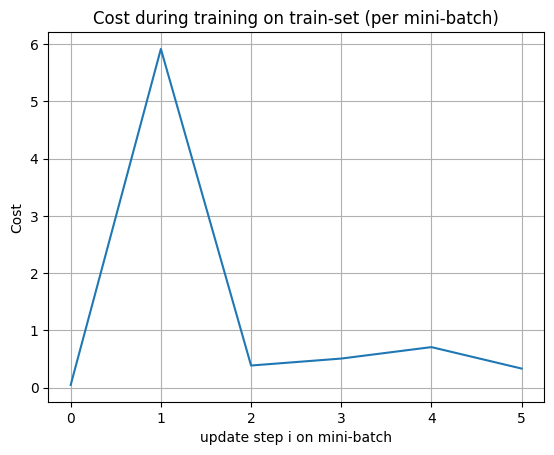

Text(0.5, 0.5, 'x2')

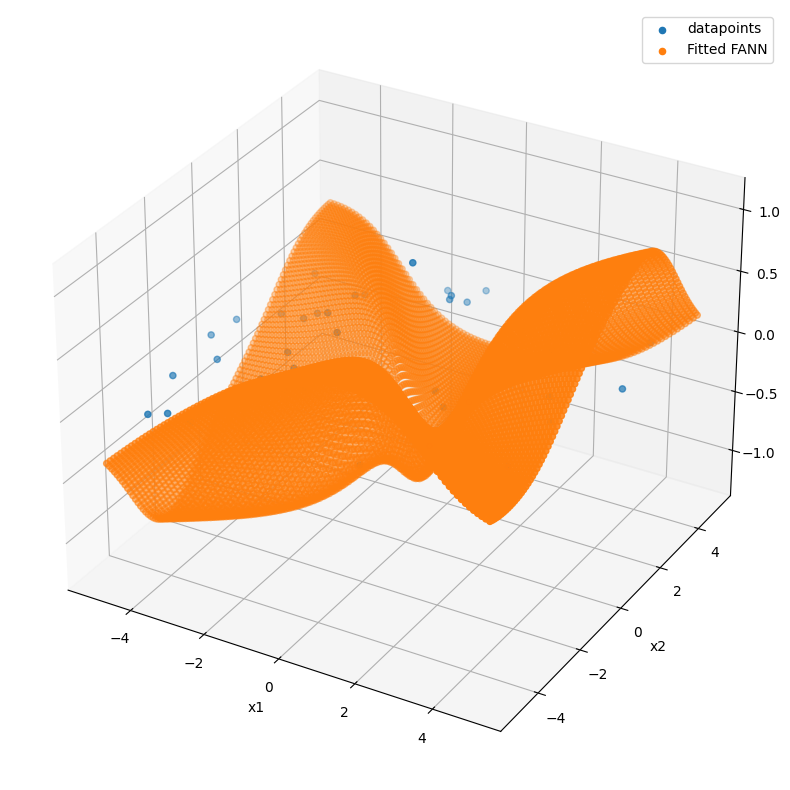

In [24]:
#8 Task E - 40

#Set parameters
######################
#Data generation
n_datapoints = 40
mean_true = t.tensor([0.0, 0.0])
sigma_noise = 0.04
train_frac = 0.5
val_frac = 0.25
test_frac = 0.25

#Training
bs = 32
n_epochs = 200
eta = 0.05
#eval_interval = 10

RMSE_list = []
training_minibatch_Js = []
######################

#Generate data
X = 10 * t.rand(size=[n_datapoints, 2]) - 5
sigma_noise = 0.04
y_obs = t.zeros(n_datapoints).reshape(-1,1)

for i in range(len(X)):
    y_obs[i] = t.exp(-((X[i,:]-mean_true).T@(X[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

my_dataset = TensorDataset(X, y_obs)

#Split data
train_data, val_data, test_data = t.utils.data.random_split(my_dataset, [int(train_frac*len(my_dataset)), int(val_frac*len(my_dataset)), int(test_frac*len(my_dataset))])

#Create training data loader
train_loader = DataLoader(dataset = train_data, batch_size=bs, shuffle=True)

#Create model
model = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 50),
    nn.Tanh(),
    nn.Linear(in_features = 50, out_features = 50),
    nn.Tanh(),
    nn.Linear(in_features = 50, out_features = 1)
)

#Create cost function
cost_function = nn.MSELoss()

#Create optimizer
optim = t.optim.Adam(model.parameters(), lr=eta)

#Model evaluation function
def evaluate_model(dataset, model):
    loader_eval = DataLoader(dataset = dataset, batch_size=len(dataset))
    cost_fn_eval = nn.MSELoss()
    model.eval()
    with t.no_grad():
        for X_batch, y_batch in loader_eval:
            y_pred = model(X_batch)
    model.train()
    eval_cost = cost_fn_eval(y_pred, y_batch)
    return t.sqrt(eval_cost).item()

#Training loop
for epoch_i in tqdm(range(n_epochs)):
    RMSE = evaluate_model(val_data, model)
    RMSE_list.append(RMSE)
    if epoch_i >= 5:
        if np.mean([[RMSE_list[epoch_i-6]], [RMSE_list[epoch_i-5]], [RMSE_list[epoch_i-4]]]) < np.mean([[RMSE_list[epoch_i-3]], [RMSE_list[epoch_i-2]], [RMSE_list[epoch_i-1]]]):
            print('Early stopping at epoch ', epoch_i)
            break
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        cost = cost_function(y_pred, y_batch)
        optim.zero_grad()
        cost.backward()
        optim.step()
        training_minibatch_Js.append(cost.item())

#Evaluate model
print('RMSE on test data: ', evaluate_model(test_data, model))

x1 = t.linspace(-5, 5, 100)
x2 = t.linspace(-5, 5, 100)
X_, Y_ = t.meshgrid(x1, x2)
s = t.stack([X_.ravel(), Y_.ravel()]).T

with t.no_grad():
    y_preds = model(s)

#Plot training
plt.plot(training_minibatch_Js)
plt.xlabel("update step i on mini-batch")
plt.ylabel("Cost")
plt.title("Cost during training on train-set (per mini-batch)")
plt.grid()
plt.show()

#Plotting 
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], y_obs, label='datapoints')
ax.scatter(s[:,0], s[:,1], y_preds, label='Fitted FANN')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [19]:
#8 Task E - 40

N_bigtest = 250000

#Generate big test data
X_bigtest = 10 * t.rand(size=[N_bigtest, 2]) - 5
y_bigtest = t.zeros(N_bigtest).reshape(-1,1)

for i in range(len(X_bigtest)):
    y_bigtest[i] = t.exp(-((X_bigtest[i,:]-mean_true).T@(X_bigtest[i,:]-mean_true))/4) + sigma_noise*t.rand(1)

my_bigtest_dataset = TensorDataset(X_bigtest, y_bigtest)

print('RMSE on test data: ', evaluate_model(test_data, model))
print('RMSE on big test data: ', evaluate_model(my_bigtest_dataset, model))

RMSE on test data:  0.539253294467926
RMSE on big test data:  0.4736153781414032
